In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats # For plotting QQ plot

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

In [4]:
df=pd.read_csv(r"C:\Users\ASUS\Downloads\concrete_data.csv")

In [5]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [8]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [10]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [11]:
# Extract X and Y for model training
X= df.drop(columns=['Strength'])
y=df.iloc[:,-1]

In [12]:
# train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
# Applying Regression without any transformation
lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

r2_score(y_test,y_pred)

0.6275531792314851

In [15]:
# Cross checking with cross validation
lr=LinearRegression()
np.mean(cross_val_score(lr,X,y,scoring='r2'))

0.4609940491662864

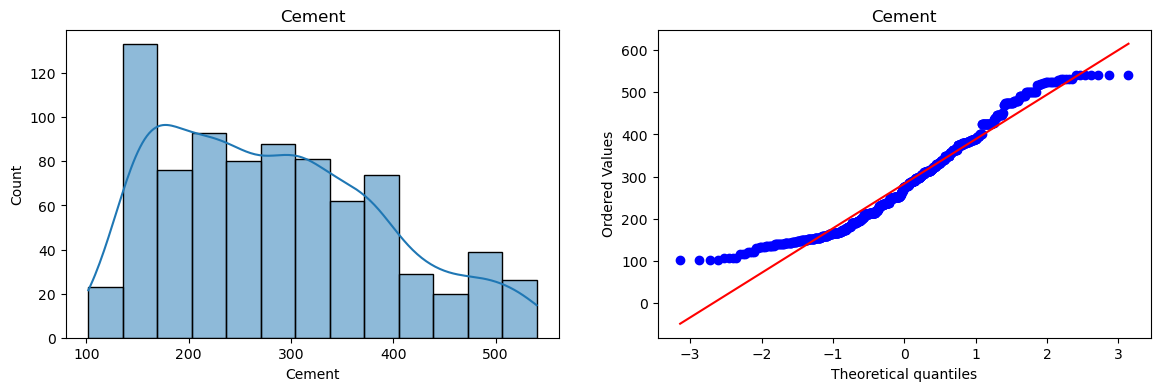

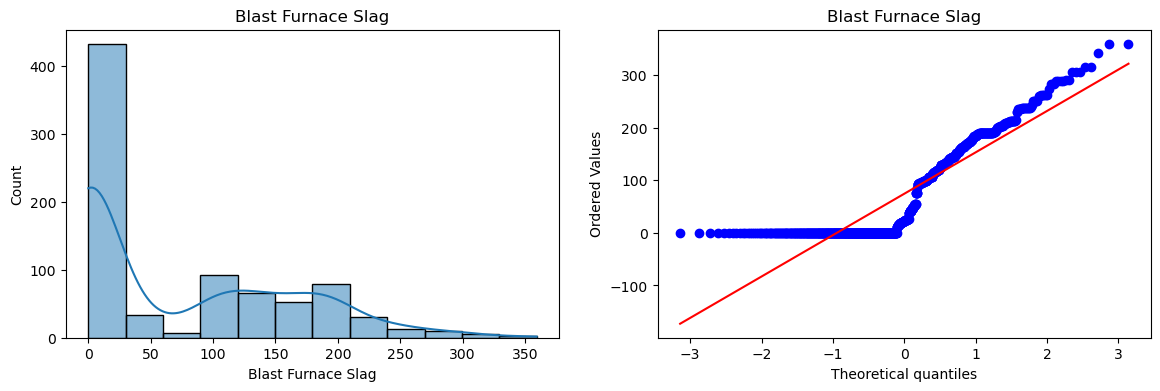

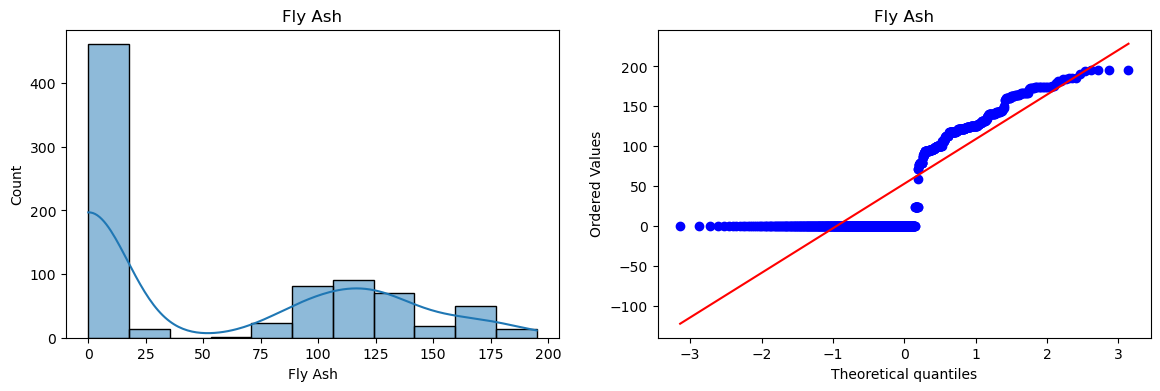

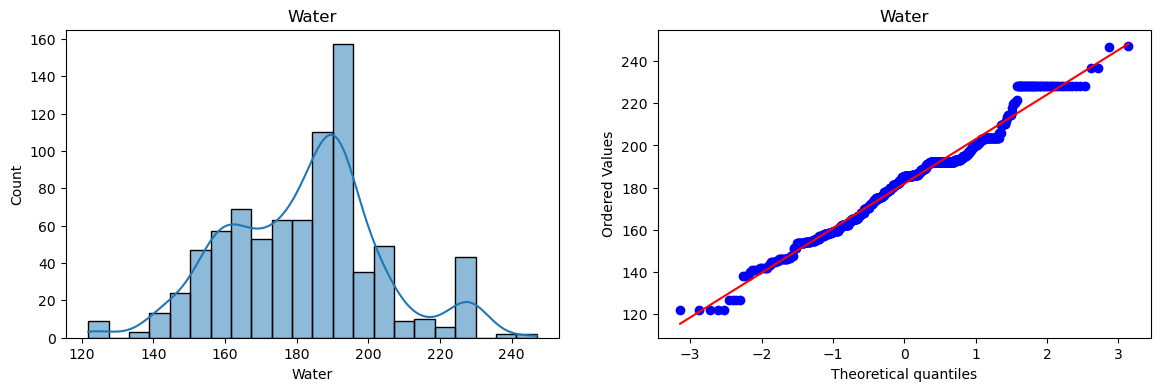

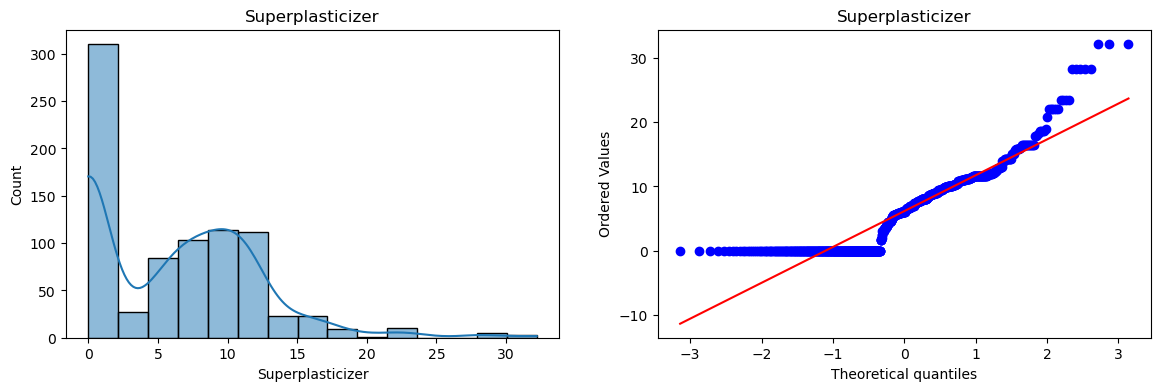

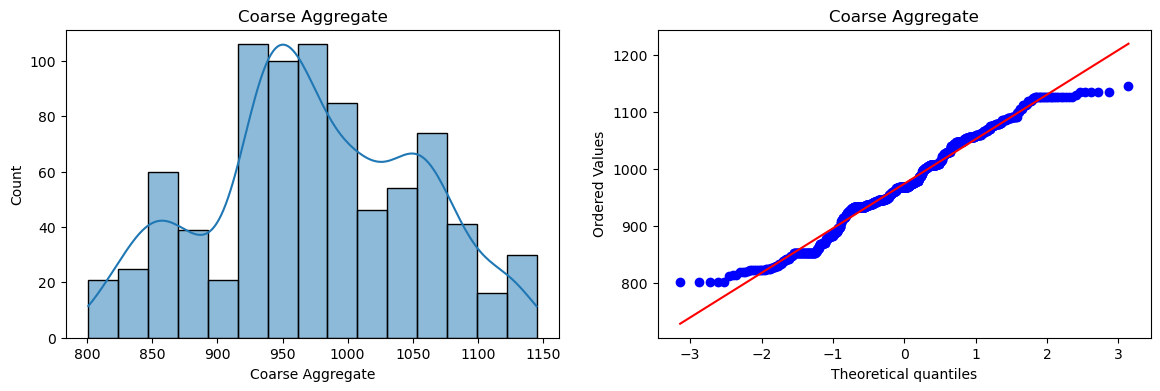

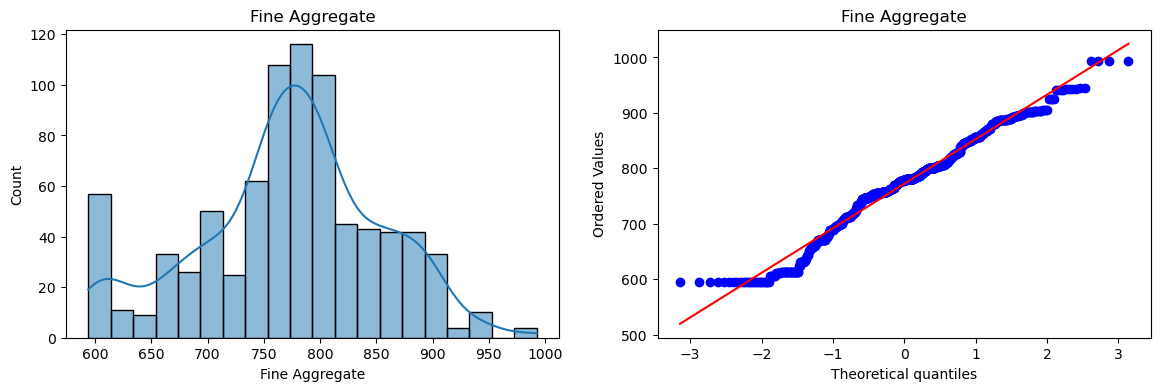

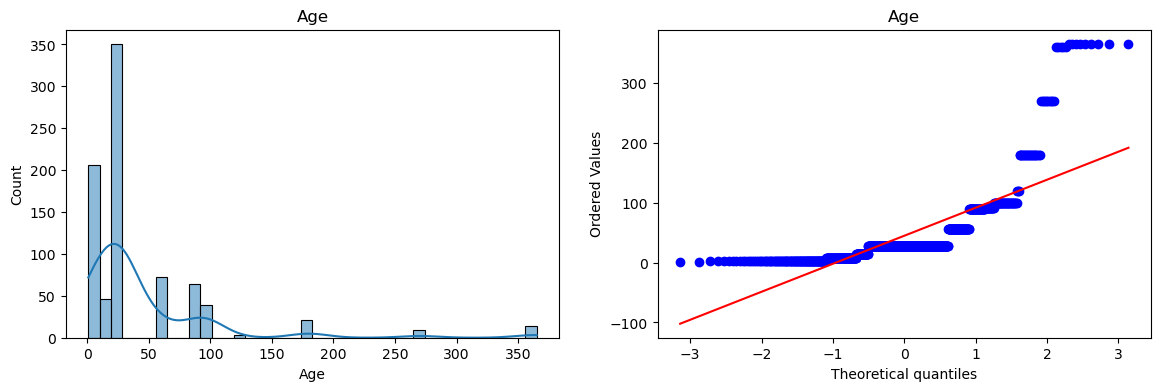

In [22]:
# Plotting the distplots without any Transformations

for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X_train[col], kde=True)
    plt.title(col)
    
    plt.subplot(122)
    stats.probplot(X_train[col],dist="norm",plot=plt) # Plotting all the columns simultaeneously
    plt.title(col)
    
    plt.show()

In [25]:
# applying Box-Cox transformation

pt = PowerTransformer(method='box-cox')

X_train_transformed = pt.fit_transform(X_train+0.000000001) # we added this value cause box-cox doesn't works with zeros
X_test_transformed = pt.transform(X_test+0.000000001)

pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_}) # When you are using box-cox transformation you are creating a lambda value for each column so we added .lambdas_ in the object that we created so it will fetch all the values of lambda

,cols,box_cox_lambdas
0,Cement,0.177025
1,Blast Furnace Slag,0.019115
2,Fly Ash,-0.028337
3,Water,0.772682
4,Superplasticizer,0.070353
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018
7,Age,0.066631


In [26]:
# Applying Linear Regression on transformed data

lr = LinearRegression()
lr.fit(X_train_transformed,y_train)

y_pred2 = lr.predict(X_test_transformed)

r2_score(y_test,y_pred2)

0.8034834015310979

In [27]:
# using cross val score

pt = PowerTransformer(method='box-cox')
X_transformed = pt.fit_transform(X+0.0000001)

lr=LinearRegression()
np.mean(cross_val_score(lr,X_transformed,y,scoring='r2'))

0.6658537942219861

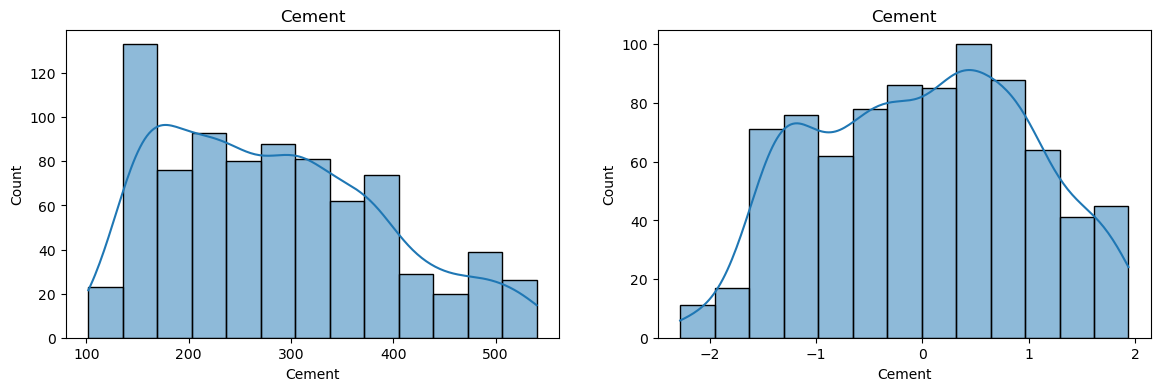

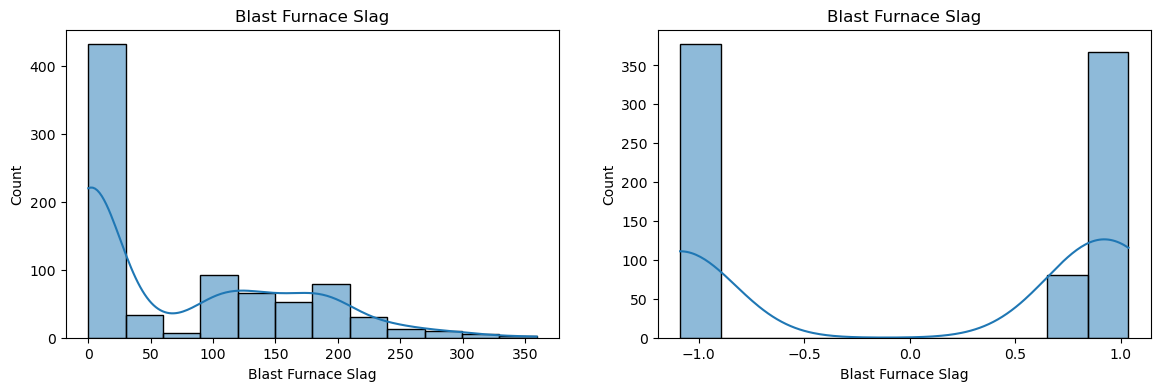

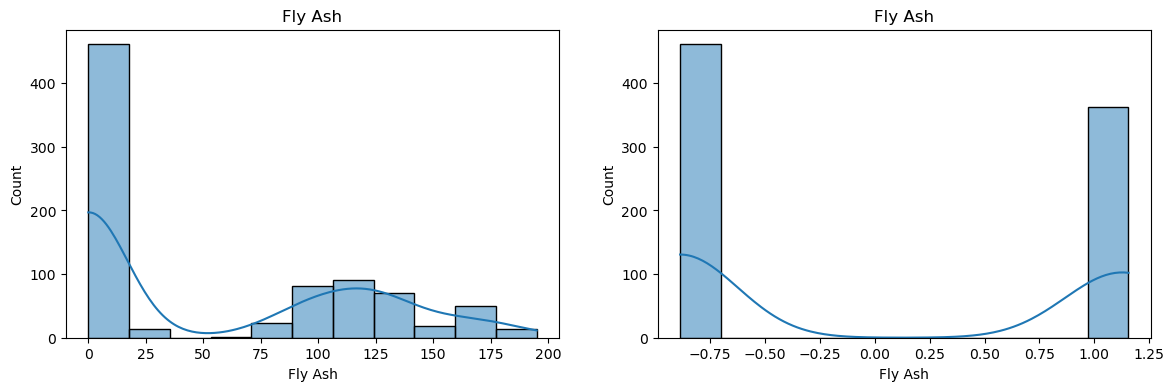

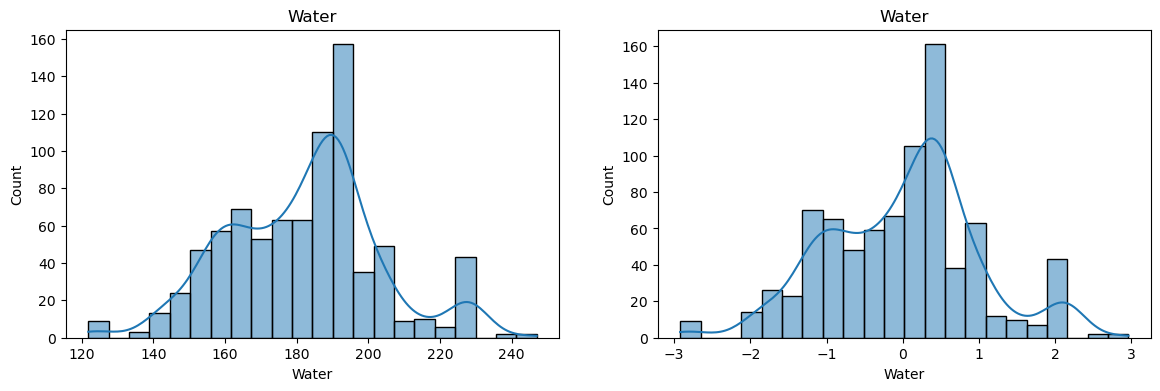

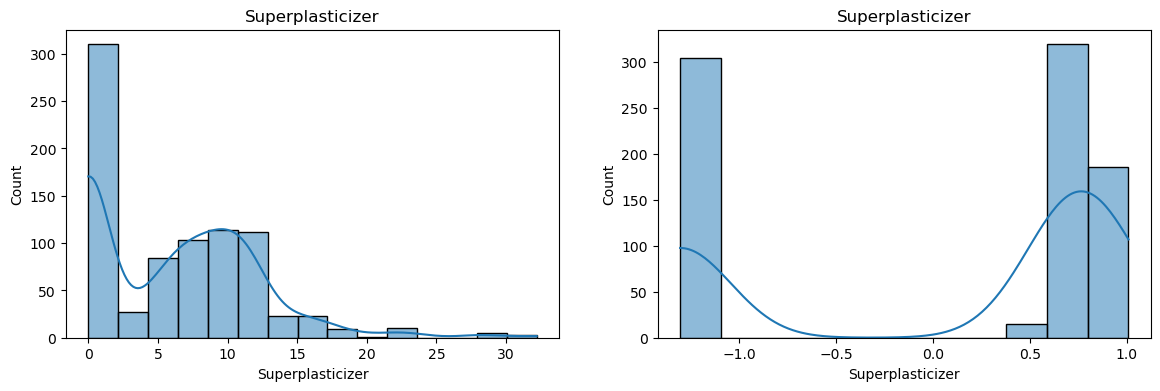

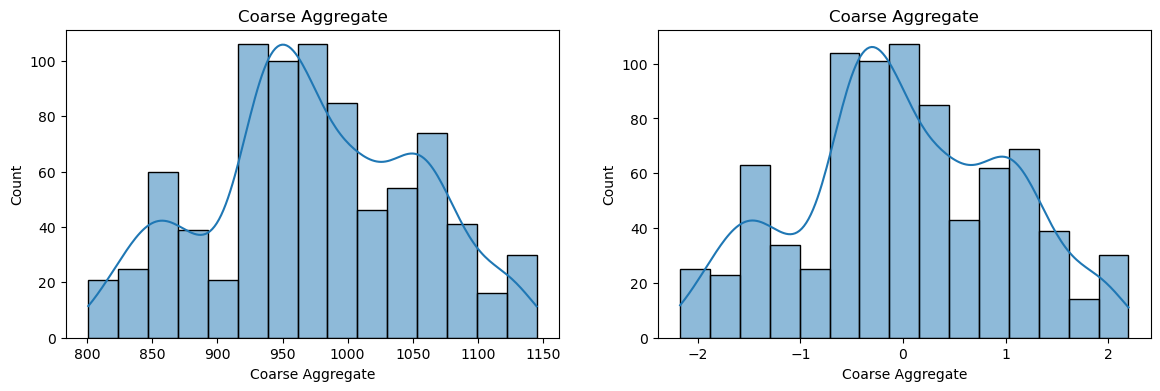

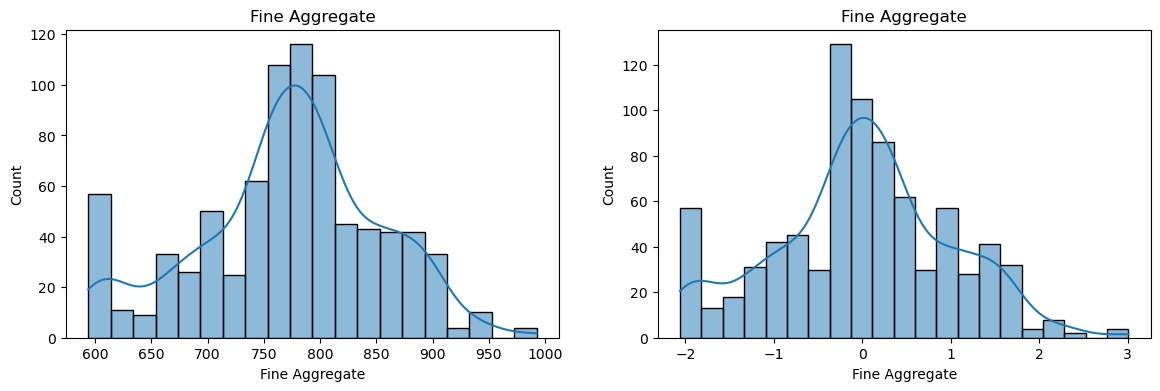

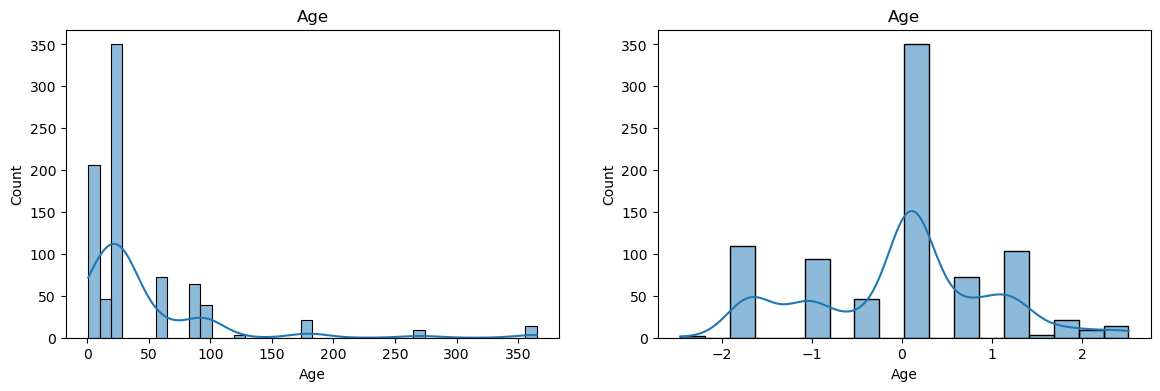

In [39]:
# Side by Side comparison 
# Before and after comparison for Box-cox plot
X_train_transformed = pd.DataFrame(X_train_transformed,columns=X_train.columns)

for col in X_train_transformed.columns :
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X_train[col] ,kde=True)
    plt.title(col)
    
    plt.subplot(122)
    sns.histplot(X_train_transformed[col],kde=True)
    plt.title(col)
    
    plt.show()

In [41]:
# Apply Yeo-johnson transform
pt1 = PowerTransformer()

X_train_transformed2 = pt1.fit_transform(X_train)
X_test_transformed2 = pt1.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_transformed2,y_train)

y_pred3 = lr.predict(X_test_transformed2)
print(r2_score(y_test,y_pred3))

pd.DataFrame({'cols':X_train.columns,'Yeo_Johnson_lambdas_':pt1.lambdas_})

0.8161906513354855


,cols,Yeo_Johnson_lambdas_
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


In [49]:
# applying cross val score

pt2=PowerTransformer()
X_transformed2 = pt.fit_transform(X)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed2,y,scoring='r2'))

0.6834625141500863

In [50]:
X_train_transformed2 = pd.DataFrame(X_train_transformed2,columns=X_train.columns)

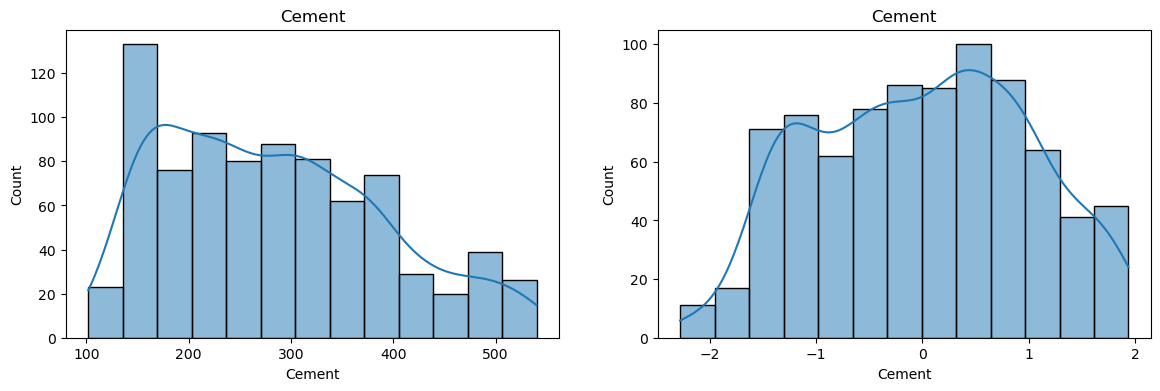

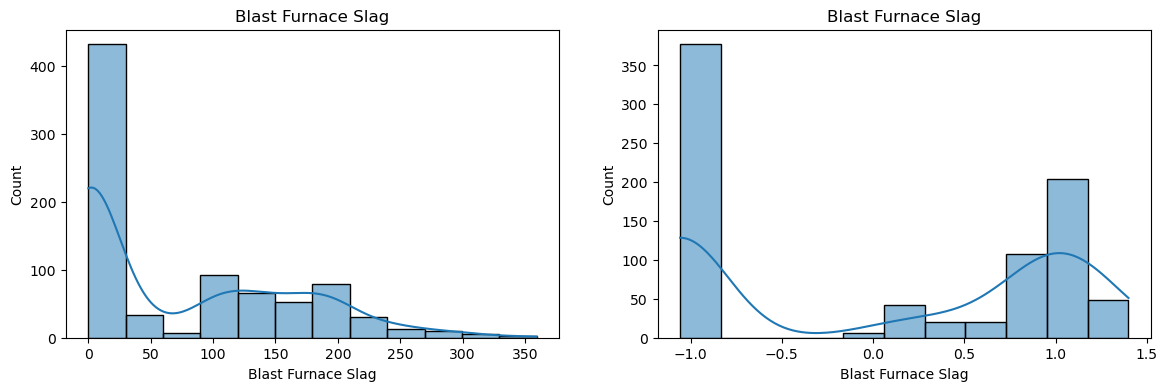

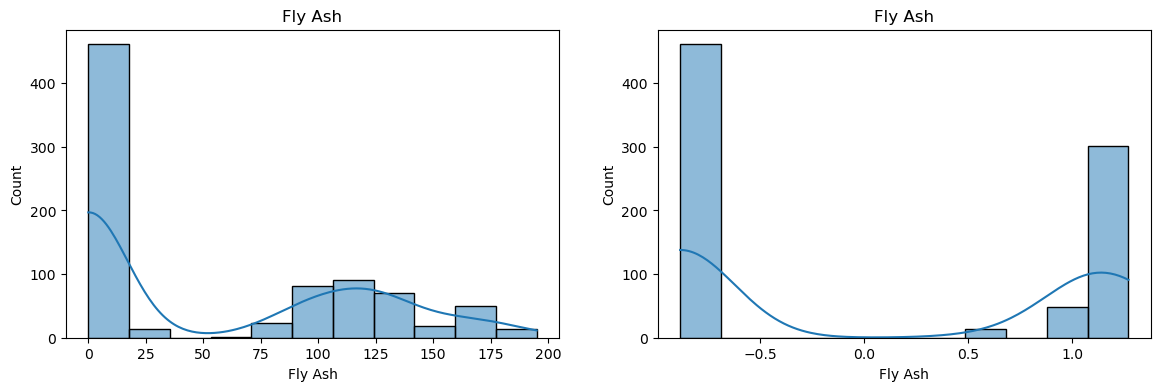

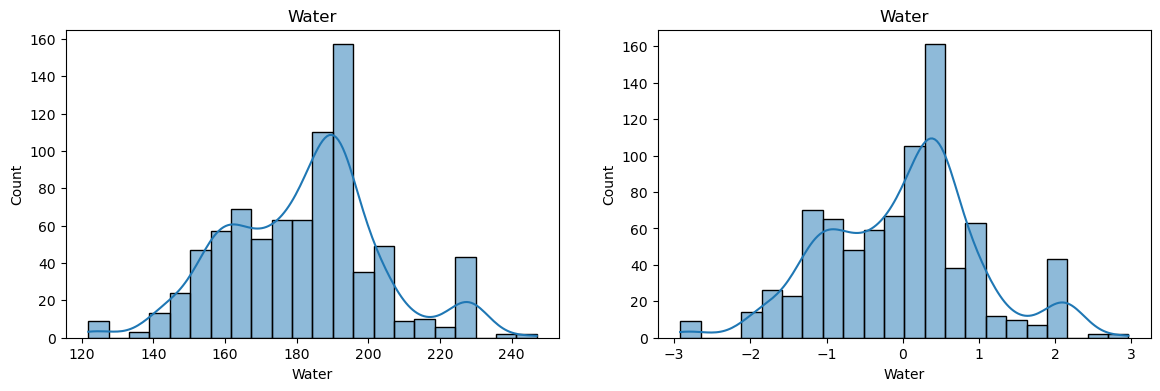

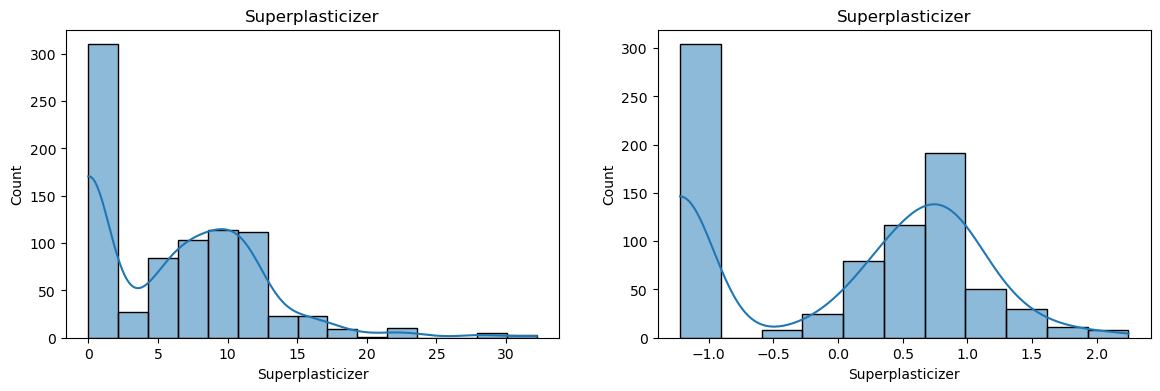

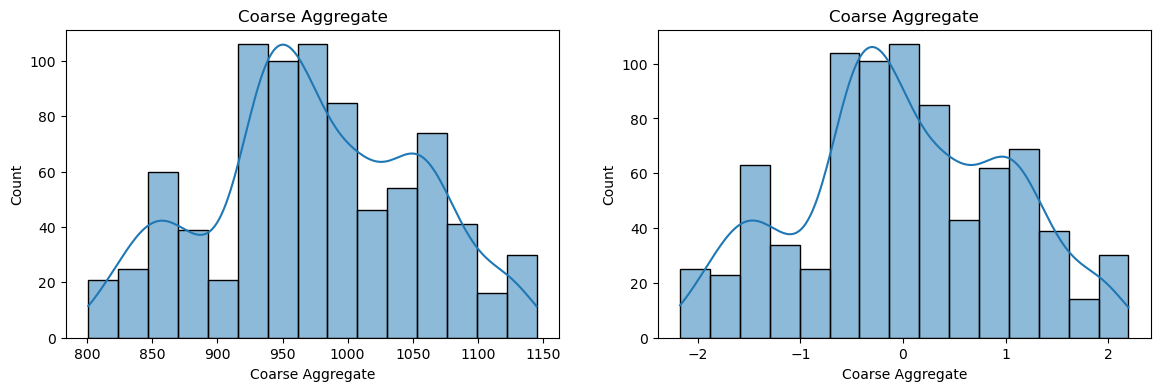

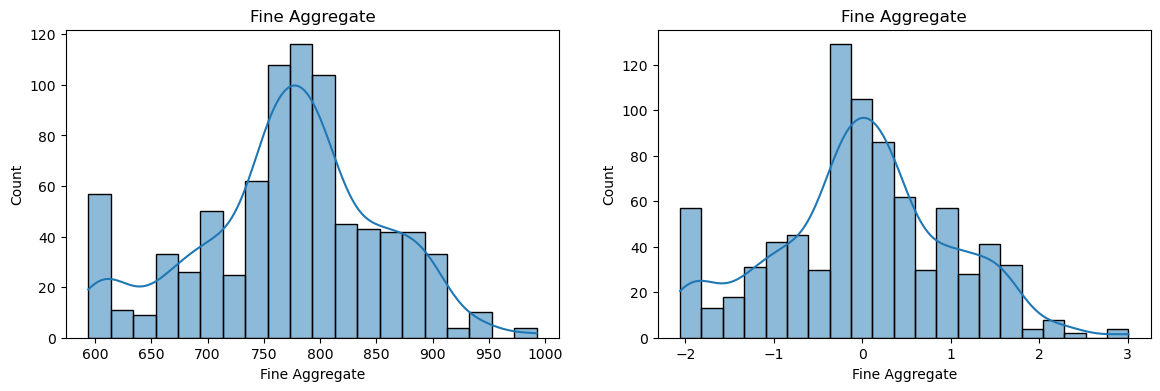

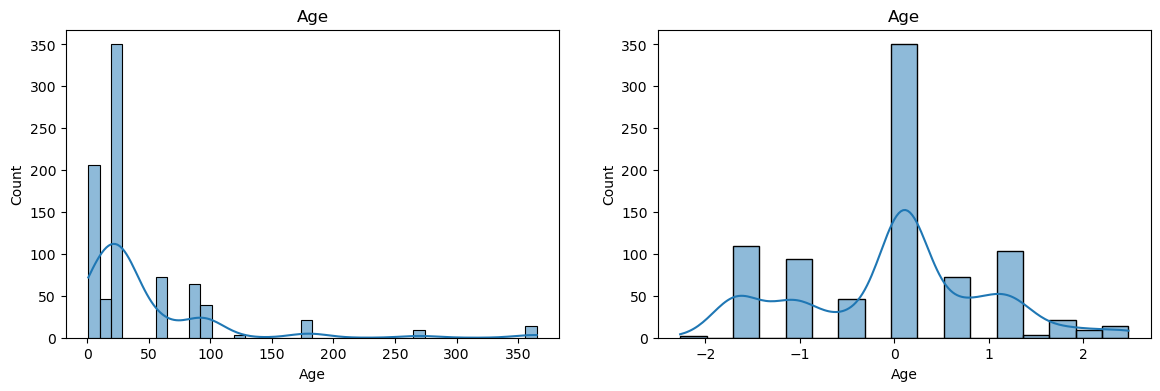

In [54]:
# Before and after comparison of Yeo-Johnson
for col in X_train_transformed2.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X_train[col],kde=True)
    plt.title(col)
    
    plt.subplot(122)
    sns.histplot(X_train_transformed2[col],kde=True)
    plt.title(col)
    
    plt.show()